# Airports

## Installations

In [9]:
# !pip3 install --upgrade pip

In [10]:
# %pip install geopandas
# %pip install folium
# %pip install tabulate

### Imports

In [11]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import Point

import folium

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx

### Display Imports & Their Versions

In [12]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


### Import Dataset

In [13]:
gdf = geopandas.read_file("airports_cleaned.geojson")

gdf

<RowID>                                         Name  \
0        Row0                               Goroka Airport   
1        Row1                               Madang Airport   
2        Row2                 Mount Hagen Kagamuga Airport   
3        Row3                               Nadzab Airport   
4        Row4  Port Moresby Jacksons International Airport   
...       ...                                          ...   
5510  Row6701              Kualanamu International Airport   
5511  Row6722           Chichen Itza International Airport   
5512  Row6735           San Cristobal de las Casas Airport   
5513  Row6749                                Yeysk Airport   
5514  Row6806                                Magas Airport   

                            City           Country IATA  ICAO   Latitude  \
0                         Goroka  Papua New Guinea  GKA  AYGA  -6.081690   
1                         Madang  Papua New Guinea  MAG  AYMD  -5.207080   
2                    Mount Hagen  Papua New Guinea  HGU  AYMH  -5.826790   
3                         Nadzab  Papua New Guinea  LAE  AYNZ  -6.569803   
4                   Port Moresby  Papua New Guinea  POM  AYPY  -9.443380   
...                          ...               ...  ...   ...        ...   
5510                       Medan         Indonesia  KNO  WIMM   3.642222   
5511                Chichen Itza            Mexico  CZA  MMCT  20.641300   
5512  San Cristobal de las Casas            Mexico  SZT  MMSC  16.690300   
5513                        Eysk            Russia  EIK  URKE  46.680000   
5514                       Magas            Russia  IGT  URMS  43.322300   

       Longitude  Altitude  Timezone DST                    TZ  \
0     145.391998      5282      10.0   U  Pacific/Port_Moresby   
1     145.789002        20      10.0   U  Pacific/Port_Moresby   
2     144.296005      5388      10.0   U  Pacific/Port_Moresby   
3     146.725977       239      10.0   U  Pacific/Port_Moresby   
4     147.220001       146      10.0   U  Pacific/Port_Moresby   
...          ...       ...       ...  ..                   ...   
5510   98.885278        23       7.0   N          Asia/Jakarta   
5511  -88.446198       102      -6.0   S   America/Mexico_City   
5512  -92.530098      7707      -6.0   N   America/Mexico_City   
5513   38.210000        60       3.0   N         Europe/Moscow   
5514   45.012600      1165       3.0   N         Europe/Moscow   

                                                GeoJSON  \
0     { "type": "FeatureCollection", "features": [ {...   
1     { "type": "FeatureCollection", "features": [ {...   
2     { "type": "FeatureCollection", "features": [ {...   
3     { "type": "FeatureCollection", "features": [ {...   
4     { "type": "FeatureCollection", "features": [ {...   
...                                                 ...   
5510  { "type": "FeatureCollection", "features": [ {...   
5511  { "type": "FeatureCollection", "features": [ {...   
5512  { "type": "FeatureCollection", "features": [ {...   
5513  { "type": "FeatureCollection", "features": [ {...   
5514  { "type": "FeatureCollection", "features": [ {...   

                        geometry  
0       POINT (145.392 -6.08169)  
1       POINT (145.789 -5.20708)  
2     POINT (144.29601 -5.82679)  
3      POINT (146.72598 -6.5698)  
4        POINT (147.22 -9.44338)  
...                          ...  
5510    POINT (98.88528 3.64222)  
5511    POINT (-88.4462 20.6413)  
5512    POINT (-92.5301 16.6903)  
5513         POINT (38.21 46.68)  
5514     POINT (45.0126 43.3223)  

[5515 rows x 14 columns]

In [14]:
gdf.describe(include='all')

<RowID>                 Name    City        Country  IATA  ICAO  \
count     5515                 5515    5515           5515  5515  5515   
unique    5515                 5490    5124            235  5515  5515   
top       Row0  Santa Maria Airport  London  United States   GKA  AYGA   
freq         1                    3       7           1132     1     1   
mean       NaN                  NaN     NaN            NaN   NaN   NaN   
std        NaN                  NaN     NaN            NaN   NaN   NaN   
min        NaN                  NaN     NaN            NaN   NaN   NaN   
25%        NaN                  NaN     NaN            NaN   NaN   NaN   
50%        NaN                  NaN     NaN            NaN   NaN   NaN   
75%        NaN                  NaN     NaN            NaN   NaN   NaN   
max        NaN                  NaN     NaN            NaN   NaN   NaN   

           Latitude    Longitude      Altitude     Timezone   DST  \
count   5515.000000  5515.000000   5515.000000  5515.000000  5515   
unique          NaN          NaN           NaN          NaN     7   
top             NaN          NaN           NaN          NaN     U   
freq            NaN          NaN           NaN          NaN  1532   
mean      24.801225    -3.052718   1014.658024     0.201677   NaN   
std       27.965765    89.090662   1676.270897     5.889275   NaN   
min      -62.190800  -179.876999  -1266.000000   -11.000000   NaN   
25%        6.055835   -80.380001     56.000000    -5.000000   NaN   
50%       32.540199     3.794110    311.000000     1.000000   NaN   
75%       45.622698    64.673450   1171.000000     5.000000   NaN   
max       82.517799   179.951004  14472.000000    13.000000   NaN   

                      TZ                                            GeoJSON  \
count               5515                                               5515   
unique               306                                               5515   
top     America/New_York  { "type": "FeatureCollection", "features": [ {...   
freq                 367                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

                                geometry  
count                               5515  
unique                              5515  
top     POINT (145.3919983 -6.081689835)  
freq                                   1  
mean                                 NaN  
std                                  NaN  
min                                  NaN  
25%                                  NaN  
50%                                  NaN  
75%                                  NaN  
max                                  NaN

### Return Information About Unqiue Values in Select Features

In [15]:
cols_to_check = [
    "<RowID>",
    "Name",
    "City",
    "Country",
    "IATA",
    "ICAO",
    "Latitude",
    "Longitude",
    "Altitude",
    "Timezone",
    "DST",
    "TZ",
    "GeoJSON"
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

<RowID> (5515)

Name (5490)

City (5124)

Country (235)

IATA (5515)

ICAO (5515)

Latitude (5501)

Longitude (5501)

Altitude (2093)

Timezone (35)
[-11.   -10.    -9.5   -9.    -8.    -7.    -6.    -5.    -4.    -3.5
  -3.    -1.     0.     1.     2.     3.     3.5    4.     4.5    5.
   5.5    5.75   6.     6.5    7.     8.     8.5    9.     9.5   10.
  10.5   11.    12.    12.75  13.  ]

DST (7)
['A' 'E' 'N' 'O' 'S' 'U' 'Z']

TZ (306)

GeoJSON (5515)



### Remove Select Features 

In [16]:
cols_to_remove = [
    "<RowID>",
    "Latitude",
    "Longitude",
    "GeoJSON",
    "Timezone",
    "DST"
]

gdf.drop(columns=cols_to_remove, inplace=True)

gdf

Name                        City  \
0                                  Goroka Airport                      Goroka   
1                                  Madang Airport                      Madang   
2                    Mount Hagen Kagamuga Airport                 Mount Hagen   
3                                  Nadzab Airport                      Nadzab   
4     Port Moresby Jacksons International Airport                Port Moresby   
...                                           ...                         ...   
5510              Kualanamu International Airport                       Medan   
5511           Chichen Itza International Airport                Chichen Itza   
5512           San Cristobal de las Casas Airport  San Cristobal de las Casas   
5513                                Yeysk Airport                        Eysk   
5514                                Magas Airport                       Magas   

               Country IATA  ICAO  Altitude                    TZ  \
0     Papua New Guinea  GKA  AYGA      5282  Pacific/Port_Moresby   
1     Papua New Guinea  MAG  AYMD        20  Pacific/Port_Moresby   
2     Papua New Guinea  HGU  AYMH      5388  Pacific/Port_Moresby   
3     Papua New Guinea  LAE  AYNZ       239  Pacific/Port_Moresby   
4     Papua New Guinea  POM  AYPY       146  Pacific/Port_Moresby   
...                ...  ...   ...       ...                   ...   
5510         Indonesia  KNO  WIMM        23          Asia/Jakarta   
5511            Mexico  CZA  MMCT       102   America/Mexico_City   
5512            Mexico  SZT  MMSC      7707   America/Mexico_City   
5513            Russia  EIK  URKE        60         Europe/Moscow   
5514            Russia  IGT  URMS      1165         Europe/Moscow   

                        geometry  
0       POINT (145.392 -6.08169)  
1       POINT (145.789 -5.20708)  
2     POINT (144.29601 -5.82679)  
3      POINT (146.72598 -6.5698)  
4        POINT (147.22 -9.44338)  
...                          ...  
5510    POINT (98.88528 3.64222)  
5511    POINT (-88.4462 20.6413)  
5512    POINT (-92.5301 16.6903)  
5513         POINT (38.21 46.68)  
5514     POINT (45.0126 43.3223)  

[5515 rows x 8 columns]

### Rename Features as Needed

In [17]:
cols_to_rename = {
    "Name": "airport_name",
    "City": "airport_city",
    "Country": "airport_country",
    "IATA": "iaca",
    "ICAO": "icao",
    "Altitude": "altitude",
    "TZ": "tz"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

airport_name  airport_city  \
0                               Goroka Airport        Goroka   
1                               Madang Airport        Madang   
2                 Mount Hagen Kagamuga Airport   Mount Hagen   
3                               Nadzab Airport        Nadzab   
4  Port Moresby Jacksons International Airport  Port Moresby   

    airport_country iaca  icao  altitude                    tz  \
0  Papua New Guinea  GKA  AYGA      5282  Pacific/Port_Moresby   
1  Papua New Guinea  MAG  AYMD        20  Pacific/Port_Moresby   
2  Papua New Guinea  HGU  AYMH      5388  Pacific/Port_Moresby   
3  Papua New Guinea  LAE  AYNZ       239  Pacific/Port_Moresby   
4  Papua New Guinea  POM  AYPY       146  Pacific/Port_Moresby   

                     geometry  
0    POINT (145.392 -6.08169)  
1    POINT (145.789 -5.20708)  
2  POINT (144.29601 -5.82679)  
3   POINT (146.72598 -6.5698)  
4     POINT (147.22 -9.44338)

## Data Visualizations

### Non-Interactive Data Visualization

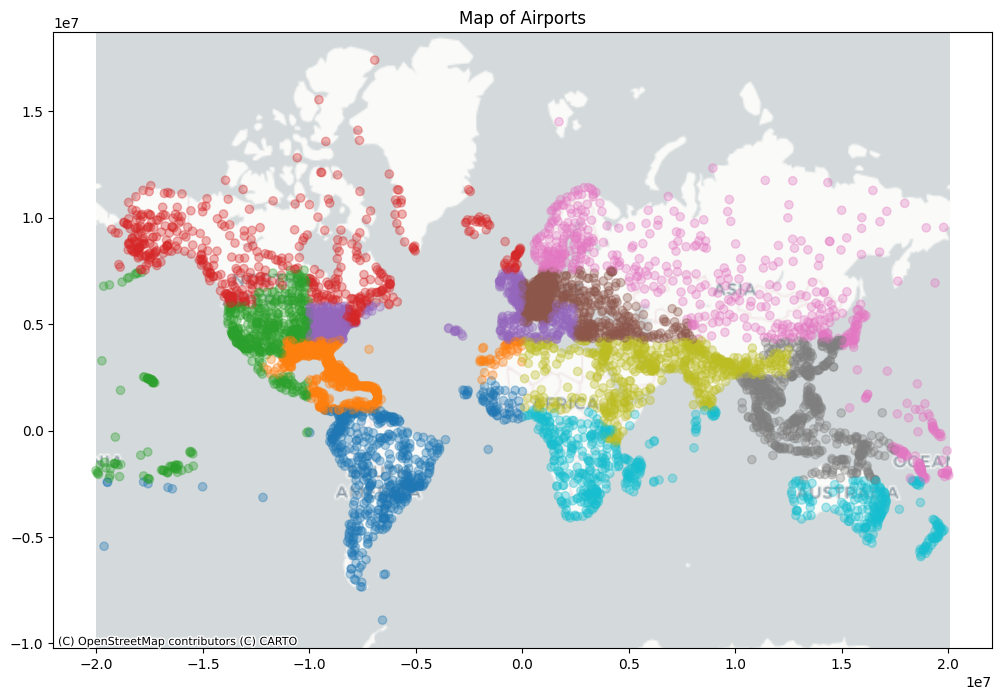

In [18]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(32, 8))
gdf_plot.plot(column='geometry', ax=ax, alpha=0.35)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Airports")

plt.show()

### Interactive Data Visualization

In [19]:
gdf.explore(
    m = folium.Map(
        location=[0, 0], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=3,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'red',
        'weight': 5,
        'opacity': 1,
        'fill': True,
        'fillColor': '#FF474C',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            'airport_name',
            'airport_city',
            'airport_country',
            'iaca',
            'icao',
            'altitude',
            'tz'
        ]
    }
)

## Methods & Attributes

### Append Geomtery Type Feature For Each Record to GeoDataFrame

In [20]:
print("Geometry Type")

gdf_gt = gdf[['airport_name', 'airport_city', 'airport_country', 'iaca', 'icao', 'altitude', 'tz']].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


airport_name                airport_city  \
0                                  Goroka Airport                      Goroka   
1                                  Madang Airport                      Madang   
2                    Mount Hagen Kagamuga Airport                 Mount Hagen   
3                                  Nadzab Airport                      Nadzab   
4     Port Moresby Jacksons International Airport                Port Moresby   
...                                           ...                         ...   
5510              Kualanamu International Airport                       Medan   
5511           Chichen Itza International Airport                Chichen Itza   
5512           San Cristobal de las Casas Airport  San Cristobal de las Casas   
5513                                Yeysk Airport                        Eysk   
5514                                Magas Airport                       Magas   

       airport_country iaca  icao  altitude                    tz  \
0     Papua New Guinea  GKA  AYGA      5282  Pacific/Port_Moresby   
1     Papua New Guinea  MAG  AYMD        20  Pacific/Port_Moresby   
2     Papua New Guinea  HGU  AYMH      5388  Pacific/Port_Moresby   
3     Papua New Guinea  LAE  AYNZ       239  Pacific/Port_Moresby   
4     Papua New Guinea  POM  AYPY       146  Pacific/Port_Moresby   
...                ...  ...   ...       ...                   ...   
5510         Indonesia  KNO  WIMM        23          Asia/Jakarta   
5511            Mexico  CZA  MMCT       102   America/Mexico_City   
5512            Mexico  SZT  MMSC      7707   America/Mexico_City   
5513            Russia  EIK  URKE        60         Europe/Moscow   
5514            Russia  IGT  URMS      1165         Europe/Moscow   

     geometry_type  
0            Point  
1            Point  
2            Point  
3            Point  
4            Point  
...            ...  
5510         Point  
5511         Point  
5512         Point  
5513         Point  
5514         Point  

[5515 rows x 8 columns]

### Add Distance Features to Dataset

In [21]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [22]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

airport_name                airport_city  \
0                                  Goroka Airport                      Goroka   
1                                  Madang Airport                      Madang   
2                    Mount Hagen Kagamuga Airport                 Mount Hagen   
3                                  Nadzab Airport                      Nadzab   
4     Port Moresby Jacksons International Airport                Port Moresby   
...                                           ...                         ...   
5510              Kualanamu International Airport                       Medan   
5511           Chichen Itza International Airport                Chichen Itza   
5512           San Cristobal de las Casas Airport  San Cristobal de las Casas   
5513                                Yeysk Airport                        Eysk   
5514                                Magas Airport                       Magas   

       airport_country iaca  icao  altitude                    tz  \
0     Papua New Guinea  GKA  AYGA      5282  Pacific/Port_Moresby   
1     Papua New Guinea  MAG  AYMD        20  Pacific/Port_Moresby   
2     Papua New Guinea  HGU  AYMH      5388  Pacific/Port_Moresby   
3     Papua New Guinea  LAE  AYNZ       239  Pacific/Port_Moresby   
4     Papua New Guinea  POM  AYPY       146  Pacific/Port_Moresby   
...                ...  ...   ...       ...                   ...   
5510         Indonesia  KNO  WIMM        23          Asia/Jakarta   
5511            Mexico  CZA  MMCT       102   America/Mexico_City   
5512            Mexico  SZT  MMSC      7707   America/Mexico_City   
5513            Russia  EIK  URKE        60         Europe/Moscow   
5514            Russia  IGT  URMS      1165         Europe/Moscow   

                                geometry  dist_from_harvard  \
0      POINT (4990469.411 -19147578.109)       2.911779e+07   
1       POINT (4944489.051 -19273000.06)       2.921941e+07   
2      POINT (5146942.999 -19170681.982)       2.919436e+07   
3      POINT (4801205.647 -19095674.024)       2.900355e+07   
4       POINT (4694933.756 -18713023.53)       2.860770e+07   
...                                  ...                ...   
5510           POINT (Infinity Infinity)                inf   
5511  POINT (-10287043.834 10416292.836)       5.601245e+06   
5512  POINT (-11336429.464 11927410.972)       7.237310e+06   
5513      POINT (3172340.145 5805940.56)       8.661872e+06   
5514      POINT (3897434.19 5738445.882)       9.379235e+06   

      frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0                  2.911779e+07                 2.911779e+07  
1                  2.921941e+07                 2.921941e+07  
2                  2.919436e+07                 2.919436e+07  
3                  2.900355e+07                 2.900355e+07  
4                  2.860770e+07                 2.860770e+07  
...                         ...                          ...  
5510                        inf                          inf  
5511               5.601245e+06                 5.601245e+06  
5512               7.237310e+06                 7.237310e+06  
5513               8.661872e+06                 8.661872e+06  
5514               9.379235e+06                 9.379235e+06  

[5515 rows x 11 columns]

### Retrieve Coordinates

In [23]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
               x          y   z
0     145.391998  -6.081690 NaN
1     145.789002  -5.207080 NaN
2     144.296005  -5.826790 NaN
3     146.725977  -6.569803 NaN
4     147.220001  -9.443380 NaN
...          ...        ...  ..
5510   98.885278   3.642222 NaN
5511  -88.446198  20.641300 NaN
5512  -92.530098  16.690300 NaN
5513   38.210000  46.680000 NaN
5514   45.012600  43.322300 NaN

[5515 rows x 3 columns]

GDF Count Coordinates:
0       1
1       1
2       1
3       1
4       1
       ..
5510    1
5511    1
5512    1
5513    1
5514    1
Length: 5515, dtype: int32

GDF Count Geometries:
0       1
1       1
2       1
3       1
4       1
       ..
5510    1
5511    1
5512    1
5513    1
5514    1
Length: 5515, dtype: int32


### Some Basic Functions

In [24]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    5515
dtype: int64

is_valid:
True    5515
dtype: int64

is_valid_reason:
Valid Geometry    5515
dtype: int64

has_z:
False    5515
dtype: int64



### Set-Theoretic Functions

In [27]:
# Clip the GeoDataFrame by the specified rectangle
gdf_clip_by_rect = gdf.clip_by_rect(-50, -40, -35, 40)

# Remove rows with empty geometries
gdf_clip_by_rect = gdf_clip_by_rect[~gdf_clip_by_rect.geometry.is_empty]

# Display the resulting GeoDataFrame
gdf_clip_by_rect

1885      POINT (-49.3015 -8.34835)
1886        POINT (-48.133 -21.812)
1887       POINT (-37.0703 -10.984)
1890      POINT (-48.4763 -1.37925)
1892      POINT (-43.9506 -19.8512)
                   ...             
5135       POINT (-43.6504 -18.232)
5141       POINT (-38.999 -15.3552)
5352       POINT (-48.468 -22.9395)
5353      POINT (-47.9037 -21.8754)
5382    POINT (-46.53751 -22.97916)
Length: 92, dtype: geometry

### Some More Functions

In [28]:
gdf_projected.buffer(distance=125)

0       POLYGON ((4990594.411 -19147578.109, 4990593.8...
1       POLYGON ((4944614.051 -19273000.06, 4944613.44...
2       POLYGON ((5147067.999 -19170681.982, 5147067.3...
3       POLYGON ((4801330.647 -19095674.024, 4801330.0...
4       POLYGON ((4695058.756 -18713023.53, 4695058.15...
                              ...                        
5510                                        POLYGON EMPTY
5511    POLYGON ((-10286918.834 10416292.836, -1028691...
5512    POLYGON ((-11336304.464 11927410.972, -1133630...
5513    POLYGON ((3172465.145 5805940.56, 3172464.543 ...
5514    POLYGON ((3897559.19 5738445.882, 3897558.588 ...
Length: 5515, dtype: geometry

In [29]:
gdf_projected.centroid

0        POINT (4990469.411 -19147578.109)
1         POINT (4944489.051 -19273000.06)
2        POINT (5146942.999 -19170681.982)
3        POINT (4801205.647 -19095674.024)
4         POINT (4694933.756 -18713023.53)
                       ...                
5510             POINT (Infinity Infinity)
5511    POINT (-10287043.834 10416292.836)
5512    POINT (-11336429.464 11927410.972)
5513        POINT (3172340.145 5805940.56)
5514        POINT (3897434.19 5738445.882)
Length: 5515, dtype: geometry

In [30]:
gdf.force_2d()

0         POINT (145.392 -6.08169)
1         POINT (145.789 -5.20708)
2       POINT (144.29601 -5.82679)
3        POINT (146.72598 -6.5698)
4          POINT (147.22 -9.44338)
                   ...            
5510      POINT (98.88528 3.64222)
5511      POINT (-88.4462 20.6413)
5512      POINT (-92.5301 16.6903)
5513           POINT (38.21 46.68)
5514       POINT (45.0126 43.3223)
Length: 5515, dtype: geometry

In [32]:
gdf.active_geometry_name

'geometry'

### Aggregating and exploding (GeoDataFrame)

In [33]:
gdf.dissolve(by='airport_country')

geometry  \
airport_country                                                        
Afghanistan        MULTIPOINT (61.86583 30.97222, 62.2283 34.21, ...   
Albania                                      POINT (19.7206 41.4147)   
Algeria            MULTIPOINT (-8.1671 27.7004, -2.26986 31.6457,...   
American Samoa     MULTIPOINT (-170.71001 -14.331, -169.425 -14.2...   
Angola             MULTIPOINT (12.1468 -15.2612, 12.1884 -5.59699...   
...                                                              ...   
Wallis and Futuna  MULTIPOINT (-178.06599 -14.3114, -176.19901 -1...   
Western Sahara     MULTIPOINT (-15.932 23.7183, -13.2192 27.1517,...   
Yemen              MULTIPOINT (42.9763 14.753, 44.1391 13.686, 44...   
Zambia             MULTIPOINT (23.1623 -15.2545, 25.8227 -17.8218...   
Zimbabwe           MULTIPOINT (25.839 -18.0959, 27.021 -18.6299, ...   

                                                 airport_name   airport_city  \
airport_country                                                                
Afghanistan                                     Herat Airport          Herat   
Albania            Tirana International Airport Mother Teresa         Tirana   
Algeria                                         Blida Airport          Blida   
American Samoa                Pago Pago International Airport      Pago Pago   
Angola                                   Mbanza Congo Airport  M'banza-congo   
...                                                       ...            ...   
Wallis and Futuna                              Hihifo Airport         Wallis   
Western Sahara                                  Smara Airport          Smara   
Yemen                           Mukalla International Airport        Mukalla   
Zambia                                        Kasompe Airport        Kasompe   
Zimbabwe           Joshua Mqabuko Nkomo International Airport       Bulawayo   

                  iaca  icao  altitude                 tz  
airport_country                                            
Afghanistan        HEA  OAHR      3206         Asia/Kabul  
Albania            TIA  LATI       126      Europe/Tirane  
Algeria            QLD  DAAB       535     Africa/Algiers  
American Samoa     PPG  NSTU        32  Pacific/Pago_Pago  
Angola             SSY  FNBC      1860      Africa/Luanda  
...                ...   ...       ...                ...  
Wallis and Futuna  WLS  NLWW        79     Pacific/Wallis  
Western Sahara     SMW  GMMA       350    Africa/El_Aaiun  
Yemen              RIY  OYRN        54          Asia/Aden  
Zambia             CGJ  FLKE      4636      Africa/Lusaka  
Zimbabwe           BUQ  FVBU      4359      Africa/Harare  

[235 rows x 7 columns]

### Interface

In [34]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'airport_name': 'Goroka Airport',
    'airport_city': 'Goroka',
    'airport_country': 'Papua New Guinea',
    'iaca': 'GKA',
    'icao': 'AYGA',
    'altitude': 5282,
    'tz': 'Pacific/Port_Moresby'},
   'geometry': {'type': 'Point', 'coordinates': (145.3919983, -6.081689835)},
   'bbox': (145.3919983, -6.081689835, 145.3919983, -6.081689835)},
  {'id': '1',
   'type': 'Feature',
   'properties': {'airport_name': 'Madang Airport',
    'airport_city': 'Madang',
    'airport_country': 'Papua New Guinea',
    'iaca': 'MAG',
    'icao': 'AYMD',
    'altitude': 20,
    'tz': 'Pacific/Port_Moresby'},
   'geometry': {'type': 'Point', 'coordinates': (145.7890015, -5.207079887)},
   'bbox': (145.7890015, -5.207079887, 145.7890015, -5.207079887)},
  {'id': '2',
   'type': 'Feature',
   'properties': {'airport_name': 'Mount Hagen Kagamuga Airport',
    'airport_city': 'Mount Hagen',
    'airport_coun

In [35]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'airport_name': 'Goroka Airport', 'airport_city': 'Goroka', 'airport_country': 'Papua New Guinea', 'iaca': 'GKA', 'icao': 'AYGA', 'altitude': 5282, 'tz': 'Pacific/Port_Moresby'}, 'geometry': {'type': 'Point', 'coordinates': (145.3919983, -6.081689835)}}
{'id': '1', 'type': 'Feature', 'properties': {'airport_name': 'Madang Airport', 'airport_city': 'Madang', 'airport_country': 'Papua New Guinea', 'iaca': 'MAG', 'icao': 'AYMD', 'altitude': 20, 'tz': 'Pacific/Port_Moresby'}, 'geometry': {'type': 'Point', 'coordinates': (145.7890015, -5.207079887)}}
{'id': '2', 'type': 'Feature', 'properties': {'airport_name': 'Mount Hagen Kagamuga Airport', 'airport_city': 'Mount Hagen', 'airport_country': 'Papua New Guinea', 'iaca': 'HGU', 'icao': 'AYMH', 'altitude': 5388, 'tz': 'Pacific/Port_Moresby'}, 'geometry': {'type': 'Point', 'coordinates': (144.2960052, -5.826789856)}}
{'id': '3', 'type': 'Feature', 'properties': {'airport_name': 'Nadzab Airport', 'ai

## Save Cleaned Dataset to File

In [37]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/